In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np

import glob

Dua kode di bawah untuk download dan unzip dataset

In [ ]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
gdd.download_file_from_google_drive(file_id='18O90Nag0DGs4eVHyceVKiXVmVsjkRD6Q',
                                    dest_path='/content/Budayaku_dataset.zip',
                                    unzip=True)

Unzipping...Done.


untuk ngecek kode di atas

In [ ]:
image_count = len(list(glob.glob('/content/Budayaku_dataset/*/*.jpg')))
print(image_count)

675


Membagi data menjadi test data dan validation data

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/Budayaku_dataset/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 675 files belonging to 13 classes.
Using 540 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/Budayaku_dataset/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 675 files belonging to 13 classes.
Using 135 files for validation.


Normalisasi data

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

Membuat model

In [ ]:
num_classes = 13

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Melatih model

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
17/17 [==============================] - 17s 967ms/step - loss: 2.7096 - accuracy: 0.1000 - val_loss: 2.5757 - val_accuracy: 0.0519
Epoch 2/10
17/17 [==============================] - 17s 963ms/step - loss: 2.4148 - accuracy: 0.1722 - val_loss: 2.3136 - val_accuracy: 0.2815
Epoch 3/10
17/17 [==============================] - 17s 968ms/step - loss: 1.8971 - accuracy: 0.4093 - val_loss: 1.9765 - val_accuracy: 0.4074
Epoch 4/10
17/17 [==============================] - 17s 971ms/step - loss: 1.4158 - accuracy: 0.5630 - val_loss: 1.5210 - val_accuracy: 0.5704
Epoch 5/10
17/17 [==============================] - 17s 975ms/step - loss: 0.9360 - accuracy: 0.7389 - val_loss: 1.3639 - val_accuracy: 0.5778
Epoch 6/10
17/17 [==============================] - 17s 978ms/step - loss: 0.6142 - accuracy: 0.8333 - val_loss: 1.1437 - val_accuracy: 0.7185
Epoch 7/10
17/17 [==============================] - 17s 982ms/step - loss: 0.3539 - accuracy: 0.9074 - val_loss: 1.3107 - val_accuracy: 0.7333

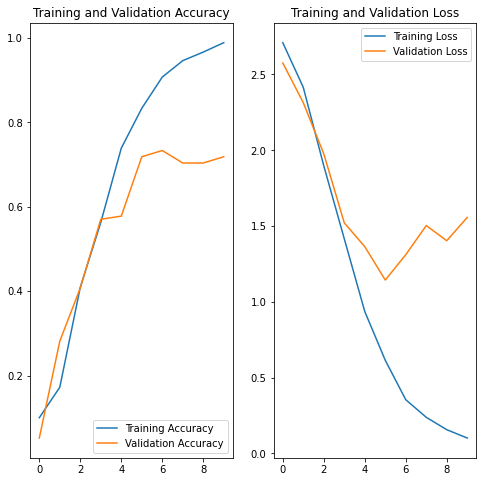

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()